## Does `EnergyModel` actually work for estimation?

The notebook runs a load of automated tests and gets the `EnergyModel` estimation of energy usage, then compares it with the values from energy.json.

In [10]:
from env import TestEnv
import pandas as pd
import json
import os
from conf import LisaLogging
from bart.common.Utils import area_under_curve
from trappy.plotter import plot_trace
from IPython.display import display
from trappy import ILinePlot
from trappy.stats.grammar import Parser

LisaLogging.setup()
import logging
logging.getLogger('Trace').setLevel(logging.WARNING)
logging.getLogger('Analysis').setLevel(logging.WARNING)
%matplotlib inline

2017-01-04 16:40:04,695 INFO    : root         : Using LISA logging configuration:
2017-01-04 16:40:04,696 INFO    : root         :   /home/brendan/lisa/logging.conf


In [2]:
import tests.eas.generic
from tests.eas.generic import EnergyModelTest

## Run all the tests
This will probalby take ages

In [3]:
# Disable drawing power from USB
!adb -s GA0113TP0180 shell "echo 'echo 0 > /sys/class/power_supply/battery/charging_enabled' | su"

In [4]:
scs = EnergyModelTest.__subclasses__()

In [6]:
tests = []
all_experiments = []
measured_energy = []
est_energy = []

for cls in scs:
    cls.setUpClass()
    t = cls()
    tests.append(t)
    for exp in t.executor.experiments:
        all_experiments.append(exp)
        json_path = os.path.join(exp.out_dir, "energy.json")
        with open(json_path) as f:
            energy = json.load(f)
        energy = sum(energy.values())
        measured_energy.append(energy)
                
        est_power = t.get_power_df(t.executor.experiments[0])['power']
        est_energy.append(area_under_curve(est_power))

2017-01-04 16:28:13,448 INFO    : LisaTest     : Setup tests execution engine...
2017-01-04 16:28:13,449 INFO    : TestEnv      : Using base path: /home/brendan/lisa
2017-01-04 16:28:13,450 INFO    : TestEnv      : Loading default (file) target configuration
2017-01-04 16:28:13,451 INFO    : TestEnv      : Loading target configuration [/home/brendan/lisa/target.config]...
2017-01-04 16:28:13,455 INFO    : TestEnv      : Loading custom (inline) test configuration
2017-01-04 16:28:13,456 INFO    : TestEnv      : External tools using:
2017-01-04 16:28:13,456 INFO    : TestEnv      :    ANDROID_HOME: /home/eas/Work/Android/android-sdk-linux
2017-01-04 16:28:13,457 INFO    : TestEnv      :    CATAPULT_HOME: /home/brendan/lisa/tools/catapult
2017-01-04 16:28:13,458 INFO    : TestEnv      : Devlib modules to load: ['bl', 'cpufreq', 'cgroups', 'hwmon']
2017-01-04 16:28:13,458 INFO    : TestEnv      : Connecting Android target [GA0113TP0180]
2017-01-04 16:28:13,459 INFO    : TestEnv      : Conn

Maximum estimated system energy: 5428
Maximum estimated system energy: 5428
Maximum estimated system energy: 5428
Maximum estimated system energy: 5428

2017-01-04 16:29:21,740 INFO    : LisaTest     : Setup tests execution engine...
2017-01-04 16:29:21,741 INFO    : Executor     : Loading custom (inline) test configuration
2017-01-04 16:29:21,741 INFO    : Executor     : 
2017-01-04 16:29:21,741 INFO    : Executor     : ################################################################################
2017-01-04 16:29:21,742 INFO    : Executor     : Experiments configuration
2017-01-04 16:29:21,742 INFO    : Executor     : ################################################################################
2017-01-04 16:29:21,742 INFO    : Executor     : Configured to run:
2017-01-04 16:29:21,743 INFO    : Executor     :      1 target configurations:
2017-01-04 16:29:21,743 INFO    : Executor     :       energy_aware
2017-01-04 16:29:21,743 INFO    : Executor     :      1 workloads (3 iterations each)
2017-01-04 16:29:21,743 INFO    : Executor     :       three_small
2017-01-04 16:29:21,744 INFO    : Executor     : Total: 3 experiments
2017


Maximum estimated system energy: 5428
Maximum estimated system energy: 5428
Maximum estimated system energy: 5428
Maximum estimated system energy: 5428

2017-01-04 16:30:18,354 INFO    : LisaTest     : Setup tests execution engine...
2017-01-04 16:30:18,354 INFO    : Executor     : Loading custom (inline) test configuration
2017-01-04 16:30:18,355 INFO    : Executor     : 
2017-01-04 16:30:18,355 INFO    : Executor     : ################################################################################
2017-01-04 16:30:18,355 INFO    : Executor     : Experiments configuration
2017-01-04 16:30:18,355 INFO    : Executor     : ################################################################################
2017-01-04 16:30:18,356 INFO    : Executor     : Configured to run:
2017-01-04 16:30:18,356 INFO    : Executor     :      1 target configurations:
2017-01-04 16:30:18,356 INFO    : Executor     :       energy_aware
2017-01-04 16:30:18,357 INFO    : Executor     :      1 workloads (3 iterations each)
2017-01-04 16:30:18,357 INFO    : Executor     :       two_big
2017-01-04 16:30:18,357 INFO    : Executor     : Total: 3 experiments
2017-01-


Maximum estimated system energy: 5428
Maximum estimated system energy: 5428
Maximum estimated system energy: 5428
Maximum estimated system energy: 5428

2017-01-04 16:31:13,203 INFO    : LisaTest     : Setup tests execution engine...
2017-01-04 16:31:13,203 INFO    : Executor     : Loading custom (inline) test configuration
2017-01-04 16:31:13,204 INFO    : Executor     : 
2017-01-04 16:31:13,204 INFO    : Executor     : ################################################################################
2017-01-04 16:31:13,204 INFO    : Executor     : Experiments configuration
2017-01-04 16:31:13,204 INFO    : Executor     : ################################################################################
2017-01-04 16:31:13,205 INFO    : Executor     : Configured to run:
2017-01-04 16:31:13,205 INFO    : Executor     :      1 target configurations:
2017-01-04 16:31:13,205 INFO    : Executor     :       energy_aware
2017-01-04 16:31:13,206 INFO    : Executor     :      1 workloads (3 iterations each)
2017-01-04 16:31:13,206 INFO    : Executor     :       two_big_three_small
2017-01-04 16:31:13,206 INFO    : Executor     : Total: 3 experime


Maximum estimated system energy: 5428
Maximum estimated system energy: 5428
Maximum estimated system energy: 5428
Maximum estimated system energy: 5428

2017-01-04 16:32:15,274 INFO    : LisaTest     : Setup tests execution engine...
2017-01-04 16:32:15,275 INFO    : Executor     : Loading custom (inline) test configuration
2017-01-04 16:32:15,275 INFO    : Executor     : 
2017-01-04 16:32:15,275 INFO    : Executor     : ################################################################################
2017-01-04 16:32:15,275 INFO    : Executor     : Experiments configuration
2017-01-04 16:32:15,276 INFO    : Executor     : ################################################################################
2017-01-04 16:32:15,276 INFO    : Executor     : Configured to run:
2017-01-04 16:32:15,276 INFO    : Executor     :      1 target configurations:
2017-01-04 16:32:15,277 INFO    : Executor     :       energy_aware
2017-01-04 16:32:15,277 INFO    : Executor     :      1 workloads (3 iterations each)
2017-01-04 16:32:15,277 INFO    : Executor     :       ramp_up
2017-01-04 16:32:15,277 INFO    : Executor     : Total: 3 experiments
2017-01-


Maximum estimated system energy: 5428
Maximum estimated system energy: 5428
Maximum estimated system energy: 5428
Maximum estimated system energy: 5428

2017-01-04 16:33:18,014 INFO    : LisaTest     : Setup tests execution engine...
2017-01-04 16:33:18,014 INFO    : Executor     : Loading custom (inline) test configuration
2017-01-04 16:33:18,014 INFO    : Executor     : 
2017-01-04 16:33:18,015 INFO    : Executor     : ################################################################################
2017-01-04 16:33:18,015 INFO    : Executor     : Experiments configuration
2017-01-04 16:33:18,015 INFO    : Executor     : ################################################################################
2017-01-04 16:33:18,016 INFO    : Executor     : Configured to run:
2017-01-04 16:33:18,016 INFO    : Executor     :      1 target configurations:
2017-01-04 16:33:18,016 INFO    : Executor     :       energy_aware
2017-01-04 16:33:18,016 INFO    : Executor     :      1 workloads (3 iterations each)
2017-01-04 16:33:18,017 INFO    : Executor     :       ramp_down
2017-01-04 16:33:18,017 INFO    : Executor     : Total: 3 experiments
2017-0


Maximum estimated system energy: 5428
Maximum estimated system energy: 5428
Maximum estimated system energy: 5428
Maximum estimated system energy: 5428

2017-01-04 16:34:20,869 INFO    : LisaTest     : Setup tests execution engine...
2017-01-04 16:34:20,869 INFO    : Executor     : Loading custom (inline) test configuration
2017-01-04 16:34:20,870 INFO    : Executor     : 
2017-01-04 16:34:20,870 INFO    : Executor     : ################################################################################
2017-01-04 16:34:20,870 INFO    : Executor     : Experiments configuration
2017-01-04 16:34:20,871 INFO    : Executor     : ################################################################################
2017-01-04 16:34:20,871 INFO    : Executor     : Configured to run:
2017-01-04 16:34:20,871 INFO    : Executor     :      1 target configurations:
2017-01-04 16:34:20,872 INFO    : Executor     :       energy_aware
2017-01-04 16:34:20,872 INFO    : Executor     :      1 workloads (3 iterations each)
2017-01-04 16:34:20,872 INFO    : Executor     :       wake_migration
2017-01-04 16:34:20,872 INFO    : Executor     : Total: 3 experiments
2


Maximum estimated system energy: 5428
Maximum estimated system energy: 5428
Maximum estimated system energy: 5428
Maximum estimated system energy: 5428


# Compare `EnergyModel` estimation with measured value

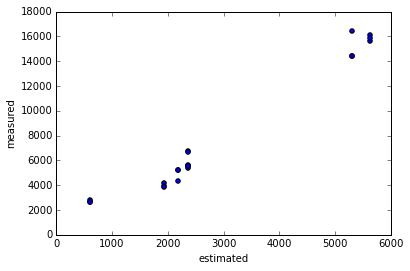

In [7]:
df = pd.DataFrame({'measured': measured_energy, 'estimated': est_energy}, columns=['measured', 'estimated'])
df.plot.scatter(x='estimated', y='measured')

In [12]:
tests

[<tests.eas.generic.OneSmallTask testMethod=runTest>,
 <tests.eas.generic.ThreeSmallTasks testMethod=runTest>,
 <tests.eas.generic.TwoBigTasks testMethod=runTest>,
 <tests.eas.generic.TwoBigThreeSmall testMethod=runTest>,
 <tests.eas.generic.RampUp testMethod=runTest>,
 <tests.eas.generic.RampDown testMethod=runTest>,
 <tests.eas.generic.EnergyModelWakeMigration testMethod=runTest>]

In [15]:
def examine(test):
    ex = test.executor.experiments[0]
    
    # Show task residency
    trace = test.get_trace(ex)
    plot_trace(trace.ftrace)
    
    print "CPU FREQ:"
    p = Parser(trace.ftrace)
    freq_df = p.solve('cpu_frequency:frequency')
    ILinePlot(freq_df, column=[2, 3], drawstyle='steps-post').view()
    
    print "RECORDED ENERGY:"
    # Show recorded energy
    # NB: This bit might only work for ACME energy meter.
    csv_path = os.path.join(ex.out_dir, "samples_Device0.csv")
    samples_df = pd.read_csv(csv_path, sep=", ", engine='python', index_col='"timestamp ms"')
    samples_df.index.name='time'
    samples_df.index /= 1000
    samples_df = samples_df[['"power mW"']]
    samples_df.columns = ['power']
    samples_df['power'] /= 1000
    ILinePlot(samples_df, column='power').view()
    
    print "ESTIMATED ENERGY:"
    # Show estimated energy
    est_df = test.get_power_df(ex)
    ILinePlot(est_df, column='power', drawstyle='steps-post').view()
examine(tests[-3])

Maximum estimated system energy: 5428


CPU FREQ:


""
""


RECOREDED ENERGY


""
""


ESTIMATED ENERGY
Maximum estimated system energy: 5428


""
""


In [16]:
df.corr()

,measured,estimated
measured,1.000000,0.982552
estimated,0.982552,1.000000
